# An adaptive ensemble framework for addressing concept drift in IoT data streams
This is the code for the paper entitled "**An adaptive ensemble framework for addressing concept drift in IoT data streams**"   <br>
Authors: Yafeng Wu (neverland0504@163.com), Lan Liu (liulan@gpnu.edu.cn), Yongjie Yu, Guiming Chen, Junhan Hu  <br>
Organization: School of Cybersecurity and Information Engineering, Guangdong Polytechnic Normal University


# 1. Load Data and Define Functions

## Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, precision_score, recall_score, f1_score
import time

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install river==0.10.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 848.6/848.6 kB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for river: filename=river-0.10.1-cp310-cp310-linux_x86_64.whl size=2102906 sha256=2b3a5541c68153b6fb459cc8dce97b0459763d99ea3c1d41efd3266753c4b290
  Stored in directory: /root/.cache/pip/wheels/ca/8e/67/2a975aa30c8517b43e5e03cff2f523a9c659688afe5f21e407
Successfully built river


In [ ]:
!pip install optunity

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 34.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for optunity: filename=Optunity-1.1.1-py3-none-any.whl size=72030 sha256=8f23ac527ff2622a80c6ee20d21df44f4eb8e615223c87c1c27c1dc0208515a2
  Stored in directory: /root/.cache/pip/wheels/83/98/40/b9956c3386a045f035f9edbf894edd04713db92f29fb58a225
Successfully built optunity


In [ ]:
!cat /proc/cpuinfo | grep 'model name'
!cat /proc/meminfo | grep 'MemTotal'

model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
MemTotal:       13294264 kB


## Dataset 1: NSL-KDD
A subset of the network traffic data sampled from the NSL-KDD dataset. And then normalized by Z-score.

In [ ]:
df = pd.read_csv("/content/drive/My Drive/AEWAE/Data/NSL-KDD_sample.csv")

In [ ]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,-0.125117,-0.201165,-0.201165,-0.201165,-0.006522,-0.042879,-0.016005,-0.070445,-0.01629,-0.094269,...,0.145010,0.681695,-0.036241,-0.352715,-0.149311,-0.462811,-0.454559,-0.526357,-0.498820,0
1,-0.125117,-0.201165,-0.201165,-0.201165,-0.006641,0.014961,-0.016005,-0.070445,-0.01629,-0.094269,...,1.099996,0.952984,-0.417654,-0.417774,-0.045228,-0.462811,-0.454559,-0.526357,-0.498820,0
2,-0.124610,-0.197211,-0.197211,-0.197211,-0.006375,-0.043571,-0.016005,-0.070445,-0.01629,-0.094269,...,-0.292320,-0.426069,-0.036241,-0.450304,-0.253394,-0.406635,-0.454559,-0.526357,-0.498820,0
3,-0.125117,-0.201165,-0.201165,-0.201165,-0.006676,-0.050557,-0.016005,-0.070445,-0.01629,-0.094269,...,-1.166981,-1.307758,-0.083918,-0.450304,-0.253394,2.346017,2.323919,-0.526357,-0.498820,1
4,-0.125117,-0.201165,-0.201165,-0.201165,-0.006676,-0.050557,-0.016005,-0.070445,-0.01629,-0.094269,...,-1.166981,-1.307758,-0.036241,-0.450304,-0.253394,2.346017,2.323919,-0.526357,-0.498820,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35136,-0.125117,-0.201165,-0.201165,-0.201165,-0.006568,-0.043571,-0.016005,-0.070445,-0.01629,-0.094269,...,0.082534,0.319976,-0.131594,-0.417774,-0.149311,-0.434723,-0.454559,-0.526357,-0.498820,0
35137,-0.125117,-0.201165,-0.201165,-0.201165,-0.006633,-0.030879,-0.016005,-0.070445,-0.01629,-0.094269,...,1.099996,0.952984,-0.417654,-0.417774,-0.149311,-0.434723,-0.454559,-0.526357,-0.498820,0
35138,-0.125117,-0.201165,-0.201165,-0.201165,0.000722,0.123865,-0.016005,-0.070445,-0.01629,1.196987,...,1.099996,0.952984,-0.417654,-0.450304,-0.253394,-0.462811,-0.454559,-0.334109,-0.313060,1
35139,-0.125117,-0.201165,-0.201165,-0.201165,-0.006670,-0.049676,-0.016005,-0.070445,-0.01629,-0.094269,...,1.073221,0.930376,-0.369978,-0.450304,-0.253394,-0.462811,-0.454559,-0.526357,-0.498820,0


In [ ]:
print(df['label'].value_counts())

1    18675
0    16466
Name: label, dtype: int64


## Train-test split
10% training set, and 90% test set

In [ ]:
X = df.drop(['label'],axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.1, test_size = 0.9, shuffle=False,random_state = 0)

## Define Functions

In [ ]:
# Import the online learning metrics and algorithms from the River library
from river import metrics
from river import stream
from river import tree,neighbors,naive_bayes,ensemble,linear_model
from river.drift import DDM, ADWIN,EDDM,HDDM_A,HDDM_W,KSWIN,PageHinkley

In [ ]:
# Define a generic adaptive learning function
# The argument "model" means an online adaptive learning algorithm
def adaptive_learning(model, X_train, y_train, X_test, y_test):
    metric = metrics.Accuracy() # Use accuracy as the metric
    i = 0 # count the number of evaluated data points
    t = [] # record the number of evaluated data points
    m = [] # record the real-time accuracy
    yt = [] # record all the true labels of the test set
    yp = [] # record all the predicted labels of the test set

    eddm = EDDM()

    # Learn the training set
    for xi1, yi1 in stream.iter_pandas(X_train, y_train):
        model.learn_one(xi1,yi1)

    # Predict the test set
    for xi, yi in stream.iter_pandas(X_test, y_test):
        y_pred= model.predict_one(xi)  # Predict the test sample
        model.learn_one(xi,yi) # Learn the test sample
        metric = metric.update(yi, y_pred) # Update the real-time accuracy

        #drift_detection part
        val = 0
        if yi != y_pred:
            val = 1
        in_drift, in_warning = eddm.update(float(val))
        if in_drift:
            print(f"Change detected at index {i}")

        t.append(i)
        m.append(metric.get()*100)
        yt.append(yi)
        yp.append(y_pred)
        i = i+1
    print("Accuracy: "+str(round(accuracy_score(yt,yp),4)*100)+"%")
    print("Precision: "+str(round(precision_score(yt,yp),4)*100)+"%")
    print("Recall: "+str(round(recall_score(yt,yp),4)*100)+"%")
    print("F1-score: "+str(round(f1_score(yt,yp),4)*100)+"%")
    return t, m

In [ ]:
# Define a figure function that shows the real-time accuracy changes
def acc_fig(t, m, name):
    plt.rcParams.update({'font.size': 15})
    plt.figure(1,figsize=(10,6))
    sns.set_style("darkgrid")
    plt.clf()
    plt.plot(t,m,'-b',label='Avg Accuracy: %.2f%%'%(m[-1]))

    plt.legend(loc='best')
    plt.title(name+' on NSL-KDD dataset', fontsize=15)
    plt.xlabel('Number of samples')
    plt.ylabel('Accuracy (%)')

    plt.draw()

# 2.AEWAE method Development

## Define the AEWAE method

In [ ]:
def AEWAE(X_train, y_train, X_test, y_test, alpha):
    metric = metrics.Accuracy()
    metric1 = metrics.Accuracy()
    metric2 = metrics.Accuracy()
    metric3 = metrics.Accuracy()
    metric4 = metrics.Accuracy()

    cumulative_error1 = 0
    cumulative_error2 = 0
    cumulative_error3 = 0
    cumulative_error4 = 0

    i = 0
    t = []
    m = []
    m1 = []
    m2 = []
    m3 = []
    m4 = []
    yt = []
    yp = []

    hat1 = ensemble.AdaptiveRandomForestClassifier(n_models=3) # ARF-ADWIN
    hat2 = neighbors.KNNADWINClassifier(window_size=100) # KNN-ADWIN
    hat3 = ensemble.AdaptiveRandomForestClassifier(n_models=3,drift_detector=EDDM(),warning_detector=EDDM()) # ARF-EDDM
    hat4 = linear_model.PAClassifier() # OPA

    for xi1, yi1 in stream.iter_pandas(X_train, y_train):
        hat1.learn_one(xi1, yi1)
        hat2.learn_one(xi1, yi1)
        hat3.learn_one(xi1, yi1)
        hat4.learn_one(xi1, yi1)

    for xi, yi in stream.iter_pandas(X_test, y_test):
        y_pred1 = hat1.predict_one(xi)
        y_prob1 = hat1.predict_proba_one(xi)
        hat1.learn_one(xi, yi)

        y_pred2 = hat2.predict_one(xi)
        y_prob2 = hat2.predict_proba_one(xi)
        hat2.learn_one(xi, yi)

        y_pred3 = hat3.predict_one(xi)
        y_prob3 = hat3.predict_proba_one(xi)
        hat3.learn_one(xi, yi)

        y_pred4 = hat4.predict_one(xi)
        y_prob4 = hat4.predict_proba_one(xi)
        hat4.learn_one(xi, yi)

        metric1 = metric1.update(yi, y_pred1)
        metric2 = metric2.update(yi, y_pred2)
        metric3 = metric3.update(yi, y_pred3)
        metric4 = metric4.update(yi, y_pred4)

        error1 = 1 if y_pred1 != yi else 0
        error2 = 1 if y_pred2 != yi else 0
        error3 = 1 if y_pred3 != yi else 0
        error4 = 1 if y_pred4 != yi else 0

        cumulative_error1 = alpha * cumulative_error1 + (1 - alpha) * error1
        cumulative_error2 = alpha * cumulative_error2 + (1 - alpha) * error2
        cumulative_error3 = alpha * cumulative_error3 + (1 - alpha) * error3
        cumulative_error4 = alpha * cumulative_error4 + (1 - alpha) * error4

        ewa_error_rate1 = cumulative_error1 / (1 - alpha ** (i + 1))
        ewa_error_rate2 = cumulative_error2 / (1 - alpha ** (i + 1))
        ewa_error_rate3 = cumulative_error3 / (1 - alpha ** (i + 1))
        ewa_error_rate4 = cumulative_error4 / (1 - alpha ** (i + 1))

        # Calculating the weights of base classifiers
        ep = 0.001
        ea = 1 / (ewa_error_rate1 + ep) + 1 / (ewa_error_rate2 + ep) + 1 / (ewa_error_rate3 + ep) + 1 / (
                ewa_error_rate4 + ep)
        w1 = 1 / (ewa_error_rate1 + ep) / ea
        w2 = 1 / (ewa_error_rate2 + ep) / ea
        w3 = 1 / (ewa_error_rate3 + ep) / ea
        w4 = 1 / (ewa_error_rate4 + ep) / ea

        # Calculating the probabilities of each class
        ypro10 = y_prob1.get(0, 0)
        ypro11 = y_prob1.get(1, 0)

        ypro20 = y_prob2.get(0, 0)
        ypro21 = y_prob2.get(1, 0)

        ypro30 = y_prob3.get(0, 0)
        ypro31 = y_prob3.get(1, 0)

        ypro40 = y_prob4.get(0, 0)
        ypro41 = y_prob4.get(1, 0)

        # Calculate the final probability and make a prediction
        y_prob_0 = w1 * ypro10 + w2 * ypro20 + w3 * ypro30 + w4 * ypro40
        y_prob_1 = w1 * ypro11 + w2 * ypro21 + w3 * ypro31 + w4 * ypro41

        if y_prob_0 > y_prob_1:
            y_pred = 0
        else:
            y_pred = 1

        # Updating the real-time accuracy of the overall model
        metric = metric.update(yi, y_pred)

        t.append(i)
        m.append(metric.get() * 100)
        yt.append(yi)
        yp.append(y_pred)

        i = i + 1

    print("Accuracy: " + str(round(accuracy_score(yt, yp), 4) * 100) + "%")
    print("Precision: " + str(round(precision_score(yt, yp), 4) * 100) + "%")
    print("Recall: " + str(round(recall_score(yt, yp), 4) * 100) + "%")
    print("F1-score: " + str(round(f1_score(yt, yp), 4) * 100) + "%")

    return t, m

## Hyperparameter optimization by BO-TPE

In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
def aewae_bo(params):
    alpha = params['alpha']
    t, m = AEWAE(X_train, y_train, X_test, y_test, alpha)


    accuracy = m[-1] / 100
    print(f"Alpha: {alpha}, Accuracy: {accuracy * 100}%")
    return {'loss': -accuracy, 'status': STATUS_OK}


In [ ]:
space = {
    'alpha': hp.uniform('alpha', 0.001, 0.1),
}
t1 = time.time()
best = fmin(
    fn=aewae_bo,
    space=space,
    algo=tpe.suggest,
    max_evals=10
)
print("Hyperopt estimated optimum {}".format(best))
t2 = time.time()
print(t2 - t1)


Accuracy: 99.03999999999999%
Precision: 99.06%
Recall: 99.15%
F1-score: 99.11%
Alpha: 0.07256895356482683, Accuracy: 99.0356341100958%
Accuracy: 99.03%
Precision: 98.98%
Recall: 99.22999999999999%
F1-score: 99.11%
Alpha: 0.05143128923603642, Accuracy: 99.03247225471907%
Accuracy: 99.19%
Precision: 99.22%
Recall: 99.28%
F1-score: 99.25%
Alpha: 0.09670142548078077, Accuracy: 99.19056502355582%
Accuracy: 99.11%
Precision: 99.00999999999999%
Recall: 99.33999999999999%
F1-score: 99.18%
Alpha: 0.00445667384686005, Accuracy: 99.10835678376071%
Accuracy: 99.29%
Precision: 99.29%
Recall: 99.4%
F1-score: 99.33999999999999%
Alpha: 0.006222085103845016, Accuracy: 99.2885825402346%
Accuracy: 99.02%
Precision: 99.14%
Recall: 99.05000000000001%
F1-score: 99.09%
Alpha: 0.09784651363100529, Accuracy: 99.02298668858887%
Accuracy: 99.06%
Precision: 99.03999999999999%
Recall: 99.22%
F1-score: 99.13%
Alpha: 0.0753154305796893, Accuracy: 99.05776709773295%
Accuracy: 99.07000000000001%
Precision: 99.16%
Reca

## Hyperparameter optimization by PSO

In [ ]:
def AEWAE_alpha_optimization(X_train, y_train, X_test, y_test, alpha):
    metric = metrics.Accuracy()
    metric1 = metrics.Accuracy()
    metric2 = metrics.Accuracy()
    metric3 = metrics.Accuracy()
    metric4 = metrics.Accuracy()

    cumulative_error1 = 0
    cumulative_error2 = 0
    cumulative_error3 = 0
    cumulative_error4 = 0

    i = 0
    t = []
    m = []
    m1 = []
    m2 = []
    m3 = []
    m4 = []
    yt = []
    yp = []

    hat1 = ensemble.AdaptiveRandomForestClassifier(n_models=3) # ARF-ADWIN
    hat2 = neighbors.KNNADWINClassifier(window_size=100) # KNN-ADWIN
    hat3 = ensemble.AdaptiveRandomForestClassifier(n_models=3,drift_detector=EDDM(),warning_detector=EDDM()) # ARF-EDDM
    hat4 = linear_model.PAClassifier() # OPA

    for xi1, yi1 in stream.iter_pandas(X_train, y_train):
        hat1.learn_one(xi1, yi1)
        hat2.learn_one(xi1, yi1)
        hat3.learn_one(xi1, yi1)
        hat4.learn_one(xi1, yi1)

    for xi, yi in stream.iter_pandas(X_test, y_test):
        y_pred1 = hat1.predict_one(xi)
        y_prob1 = hat1.predict_proba_one(xi)
        hat1.learn_one(xi, yi)

        y_pred2 = hat2.predict_one(xi)
        y_prob2 = hat2.predict_proba_one(xi)
        hat2.learn_one(xi, yi)

        y_pred3 = hat3.predict_one(xi)
        y_prob3 = hat3.predict_proba_one(xi)
        hat3.learn_one(xi, yi)

        y_pred4 = hat4.predict_one(xi)
        y_prob4 = hat4.predict_proba_one(xi)
        hat4.learn_one(xi, yi)

        metric1 = metric1.update(yi, y_pred1)
        metric2 = metric2.update(yi, y_pred2)
        metric3 = metric3.update(yi, y_pred3)
        metric4 = metric4.update(yi, y_pred4)

        error1 = 1 if y_pred1 != yi else 0
        error2 = 1 if y_pred2 != yi else 0
        error3 = 1 if y_pred3 != yi else 0
        error4 = 1 if y_pred4 != yi else 0

        cumulative_error1 = alpha * cumulative_error1 + (1 - alpha) * error1
        cumulative_error2 = alpha * cumulative_error2 + (1 - alpha) * error2
        cumulative_error3 = alpha * cumulative_error3 + (1 - alpha) * error3
        cumulative_error4 = alpha * cumulative_error4 + (1 - alpha) * error4

        ewa_error_rate1 = cumulative_error1 / (1 - alpha ** (i + 1))
        ewa_error_rate2 = cumulative_error2 / (1 - alpha ** (i + 1))
        ewa_error_rate3 = cumulative_error3 / (1 - alpha ** (i + 1))
        ewa_error_rate4 = cumulative_error4 / (1 - alpha ** (i + 1))


        ep = 0.001
        ea = 1 / (ewa_error_rate1 + ep) + 1 / (ewa_error_rate2 + ep) + 1 / (ewa_error_rate3 + ep) + 1 / (
                ewa_error_rate4 + ep)
        w1 = 1 / (ewa_error_rate1 + ep) / ea
        w2 = 1 / (ewa_error_rate2 + ep) / ea
        w3 = 1 / (ewa_error_rate3 + ep) / ea
        w4 = 1 / (ewa_error_rate4 + ep) / ea


        ypro10 = y_prob1.get(0, 0)
        ypro11 = y_prob1.get(1, 0)

        ypro20 = y_prob2.get(0, 0)
        ypro21 = y_prob2.get(1, 0)

        ypro30 = y_prob3.get(0, 0)
        ypro31 = y_prob3.get(1, 0)

        ypro40 = y_prob4.get(0, 0)
        ypro41 = y_prob4.get(1, 0)


        y_prob_0 = w1 * ypro10 + w2 * ypro20 + w3 * ypro30 + w4 * ypro40
        y_prob_1 = w1 * ypro11 + w2 * ypro21 + w3 * ypro31 + w4 * ypro41

        if y_prob_0 > y_prob_1:
            y_pred = 0
        else:
            y_pred = 1


        metric = metric.update(yi, y_pred)

        t.append(i)
        m.append(metric.get() * 100)
        yt.append(yi)
        yp.append(y_pred)

        i = i + 1

    return metric.get()



In [ ]:
def optimize_AEWAE(alpha):
    return AEWAE_alpha_optimization( X_train, y_train, X_test, y_test, alpha)

In [ ]:
import optunity
import optunity.metrics
search = {
    'alpha': [0.001, 0.1],
}


optimal_configuration, info, _ = optunity.maximize(optimize_AEWAE,
                                                   solver_name='particle swarm',
                                                   num_evals=10,
                                                   **search
                                                  )

print(optimal_configuration)
print("Accuracy: " + str(info.optimum))

{'alpha': 0.08656152343750001}
Accuracy: 0.9919372687893255


# 3.Model Learning

## Base Model Learning for Comparison Purposes
State-of-the-art online learning models:
* Adaptive Random Forest (ARF) model with ADWIN drift detector (ARF-ADWIN)
* Adaptive Random Forest (ARF) model with EDDM drift detector (ARF-EDDM)
* Online Passive-Aggressive (OPA)
* Streaming Random Patches (SRP)
* K-Nearest Neighbors (KNN) classifier with ADWIN change detector (KNN-ADWIN)
* Hoeffding Tree (HT)
* Hierarchical Attentive Temporal Memory(HATT)
* Performance Weighted Probability Averaging Ensemble (PWPAE)
  * Proposed by LiYang
* Window-based Performance Weighted Probability Averaging Ensemble (W-PWPAE)
  * Proposed by LiYang
* Adaptive Exponentially Weighted Ensemble(AEWAE)
  * Proposed this paper


Change detected at index 1322
Change detected at index 2156
Change detected at index 3279
Change detected at index 4380
Change detected at index 9435
Change detected at index 9592
Change detected at index 9767
Change detected at index 10433
Change detected at index 10717
Change detected at index 11029
Change detected at index 11440
Change detected at index 11938
Accuracy: 94.99%
Precision: 95.48%
Recall: 95.22%
F1-score: 95.35%
CPU times: user 34 s, sys: 152 ms, total: 34.2 s
Wall time: 42.3 s


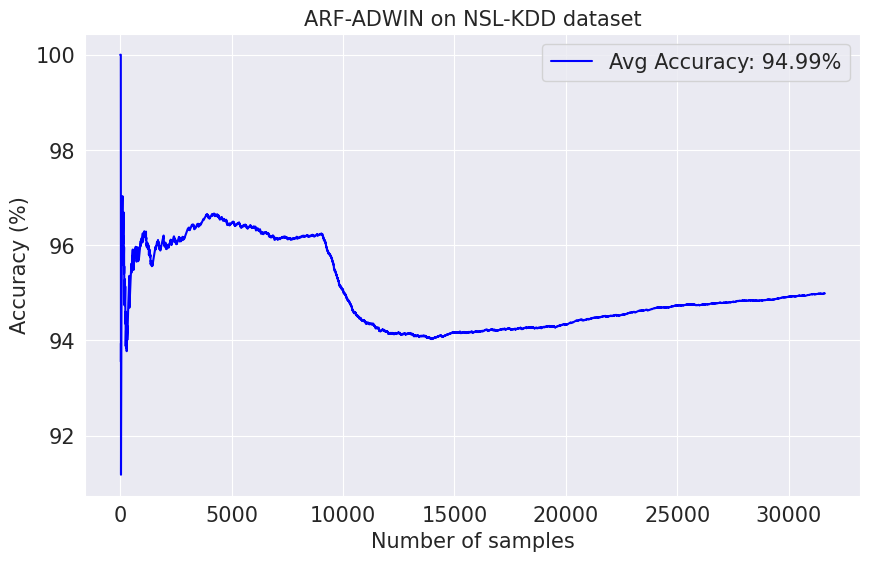

In [ ]:
%%time
# Use the Adaptive Random Forest (ARF) model with ADWIN drift detector
name1 = "ARF-ADWIN"
model1 = ensemble.AdaptiveRandomForestClassifier(n_models = 3, drift_detector = ADWIN()) # Define the model
t, m1 = adaptive_learning(model1, X_train, y_train, X_test, y_test) # Learn the model on the dataset
acc_fig(t, m1, name1) # Draw the figure of how the real-time accuracy changes with the number of samples

Change detected at index 9534
Change detected at index 9815
Change detected at index 10219
Change detected at index 10501
Change detected at index 10933
Change detected at index 11147
Change detected at index 11410
Change detected at index 11796
Change detected at index 12621
Change detected at index 13161
Change detected at index 13705
Change detected at index 14379
Change detected at index 15263
Change detected at index 16041
Change detected at index 16954
Change detected at index 17737
Change detected at index 18659
Change detected at index 19501
Change detected at index 21382
Change detected at index 22373
Change detected at index 24407
Change detected at index 25525
Change detected at index 30494
Change detected at index 31461
Accuracy: 96.3%
Precision: 96.7%
Recall: 96.43%
F1-score: 96.57%
CPU times: user 45.7 s, sys: 280 ms, total: 46 s
Wall time: 48.7 s


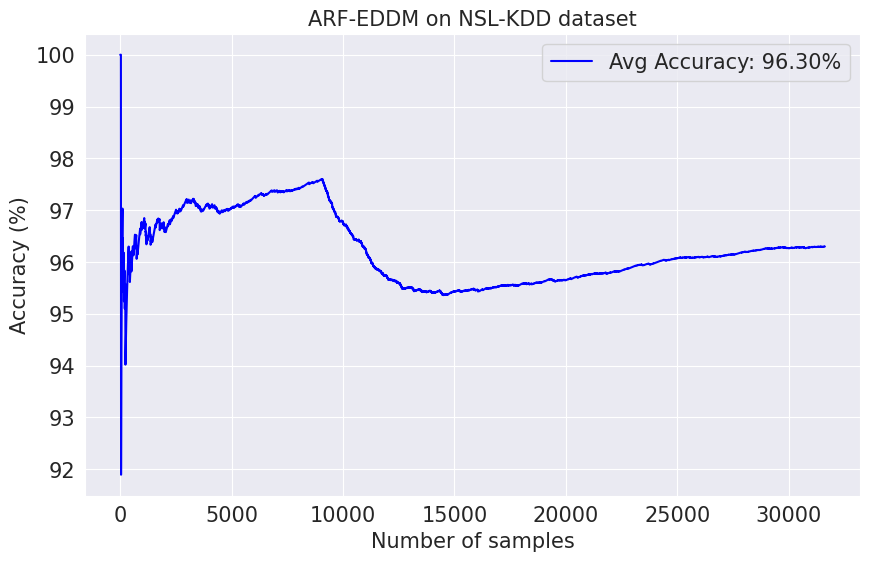

In [ ]:
%%time
# Use the Adaptive Random Forest (ARF) model with EDDM drift detector
name2 = "ARF-EDDM"
model2 = ensemble.AdaptiveRandomForestClassifier(n_models = 3, drift_detector = EDDM()) # Define the model
t, m2 = adaptive_learning(model2, X_train, y_train, X_test, y_test) # Learn the model on the dataset
acc_fig(t, m2, name2) # Draw the figure of how the real-time accuracy changes with the number of samples

Change detected at index 389
Change detected at index 1670
Change detected at index 2091
Change detected at index 2674
Change detected at index 3110
Change detected at index 3512
Change detected at index 4003
Change detected at index 4436
Change detected at index 5088
Change detected at index 5743
Change detected at index 6342
Change detected at index 6715
Change detected at index 7077
Change detected at index 7641
Change detected at index 8097
Change detected at index 8638
Change detected at index 9086
Change detected at index 9297
Change detected at index 9536
Change detected at index 9778
Change detected at index 11470
Change detected at index 11811
Change detected at index 12016
Change detected at index 12666
Change detected at index 12999
Change detected at index 13170
Change detected at index 13531
Change detected at index 13743
Change detected at index 14021
Change detected at index 14348
Accuracy: 89.16%
Precision: 90.53%
Recall: 89.25999999999999%
F1-score: 89.89%
CPU times: u

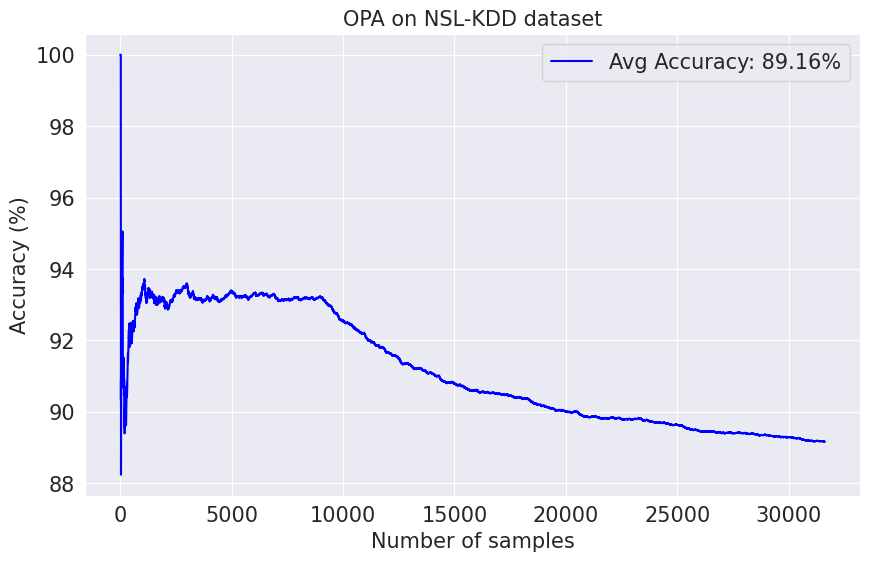

In [ ]:
%%time
# Use the Online Passive-Aggressive (OPA) model
name3 = "OPA"
model3 = linear_model.PAClassifier() # Define the model
t, m3 = adaptive_learning(model3, X_train, y_train, X_test, y_test) # Learn the model on the dataset
acc_fig(t, m3, name3) # Draw the figure of how the real-time accuracy changes with the number of samples

Change detected at index 1362
Change detected at index 3847
Change detected at index 9250
Change detected at index 9516
Change detected at index 10738
Change detected at index 11119
Change detected at index 11576
Change detected at index 11995
Change detected at index 12406
Change detected at index 15363
Change detected at index 16031
Change detected at index 16939
Change detected at index 17670
Change detected at index 18535
Change detected at index 19506
Change detected at index 21020
Change detected at index 21860
Change detected at index 22602
Change detected at index 23679
Change detected at index 24653
Change detected at index 25385
Change detected at index 30591
Change detected at index 31240
Accuracy: 96.48%
Precision: 96.6%
Recall: 96.89999999999999%
F1-score: 96.75%
CPU times: user 3min 7s, sys: 573 ms, total: 3min 8s
Wall time: 3min 13s


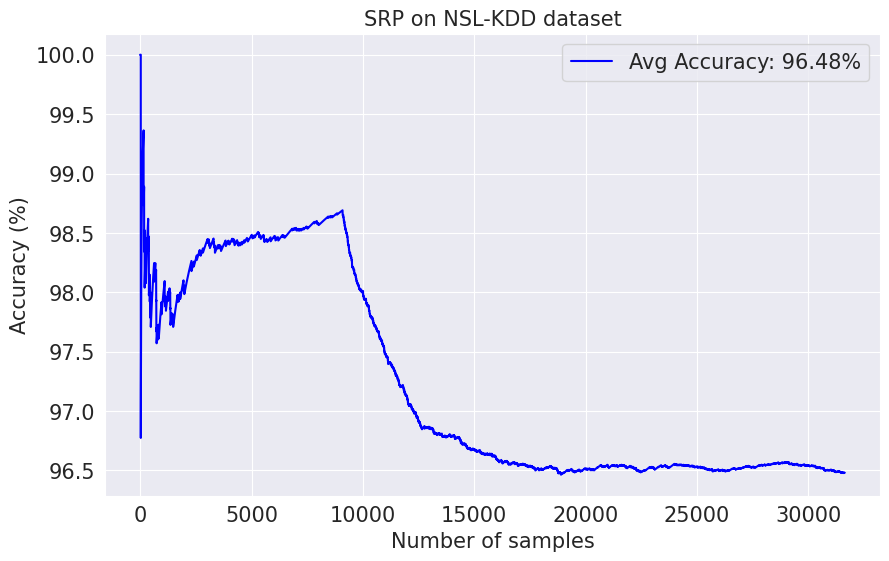

In [ ]:
%%time
# Use the Streaming Random Patches (SRP) model
name4 = "SRP"
model4 = ensemble.SRPClassifier(n_models = 3) # Define the model
t, m4 = adaptive_learning(model4, X_train, y_train, X_test, y_test) # Learn the model on the dataset
acc_fig(t, m4, name4) # Draw the figure of how the real-time accuracy changes with the number of samples

Change detected at index 456
Change detected at index 1111
Change detected at index 2115
Change detected at index 2670
Change detected at index 3174
Change detected at index 3493
Change detected at index 3913
Change detected at index 4281
Change detected at index 4776
Change detected at index 5338
Change detected at index 6926
Change detected at index 7582
Change detected at index 7942
Change detected at index 8398
Change detected at index 8839
Change detected at index 9209
Change detected at index 9479
Change detected at index 10469
Change detected at index 10795
Change detected at index 10989
Change detected at index 11295
Change detected at index 11477
Change detected at index 11796
Change detected at index 12740
Change detected at index 13011
Change detected at index 13257
Change detected at index 13545
Change detected at index 13790
Change detected at index 14101
Change detected at index 14379
Change detected at index 14672
Change detected at index 15044
Change detected at index 1

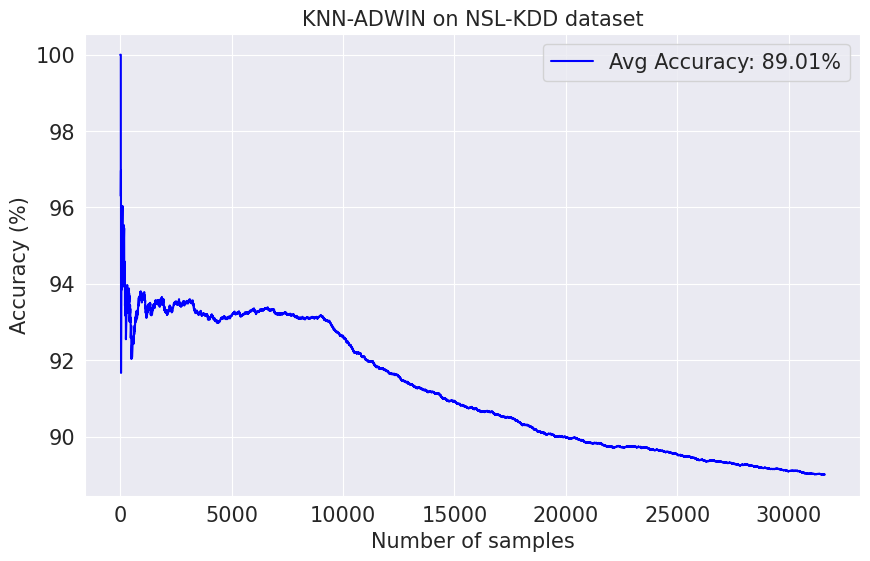

In [ ]:
%%time
# Use the K-Nearest Neighbors (KNN) classifier with ADWIN change detector
name5 = "KNN-ADWIN"
model5 = neighbors.KNNADWINClassifier(window_size=100) # Define the model
t, m5 = adaptive_learning(model5, X_train, y_train, X_test, y_test) # Learn the model on the dataset
acc_fig(t, m5, name5) # Draw the figure of how the real-time accuracy changes with the number of samples

Change detected at index 230
Change detected at index 449
Change detected at index 1708
Change detected at index 1959
Change detected at index 2265
Change detected at index 2508
Change detected at index 9452
Accuracy: 90.92%
Precision: 92.66%
Recall: 90.35%
F1-score: 91.49000000000001%
CPU times: user 18.6 s, sys: 149 ms, total: 18.7 s
Wall time: 18.9 s


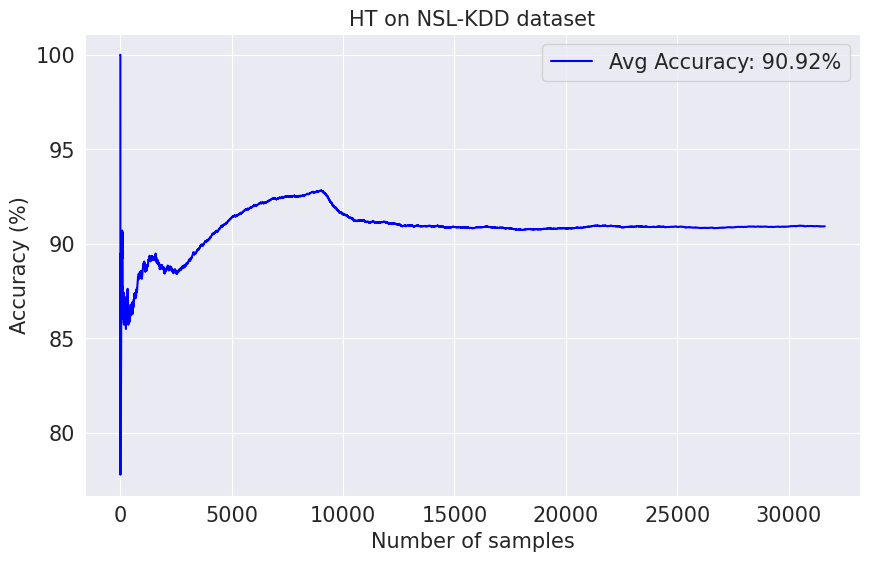

In [ ]:
%%time
# Use the HoeffdingTree model
name6 = "HT"
model6 = tree.HoeffdingTreeClassifier() # Define the model
t, m6 = adaptive_learning(model6, X_train, y_train, X_test, y_test) # Learn the model on the dataset
acc_fig(t, m6, name6) # Draw the figure of how the real-time accuracy changes with the number of samples

Change detected at index 180
Change detected at index 596
Change detected at index 846
Change detected at index 1111
Change detected at index 10022
Change detected at index 10172
Accuracy: 90.77%
Precision: 94.38%
Recall: 88.14999999999999%
F1-score: 91.16%
CPU times: user 49.1 s, sys: 181 ms, total: 49.3 s
Wall time: 52.2 s


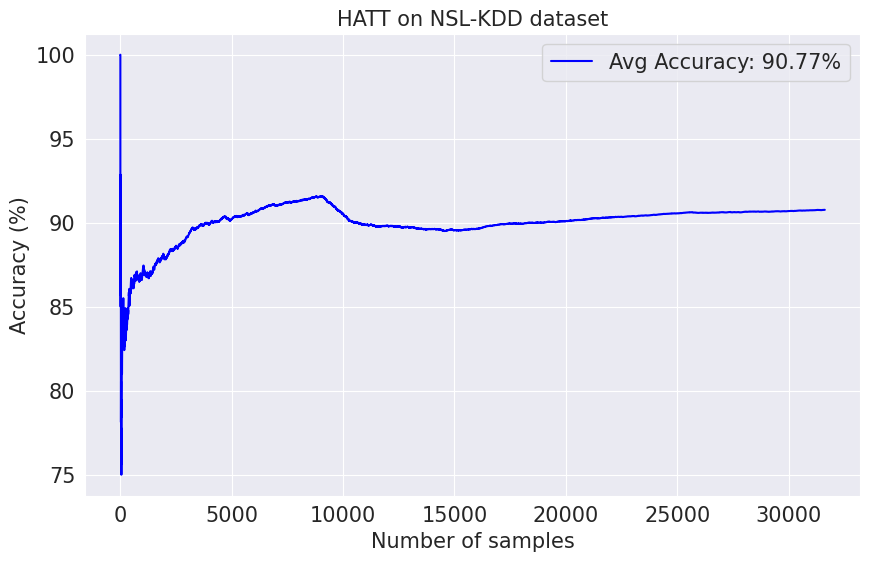

In [ ]:
%%time
# Use the HoeffdingAdaptiveTree model
name7 = "HATT"
model7 = tree.HoeffdingAdaptiveTreeClassifier() # Define the model
t, m7 = adaptive_learning(model7, X_train, y_train, X_test, y_test) # Learn the model on the dataset
acc_fig(t, m7, name7) # Draw the figure of how the real-time accuracy changes with the number of samples

In [ ]:
# Define the Performance Weighted Probability Averaging Ensemble (PWPAE) model
def PWPAE(X_train, y_train, X_test, y_test):
    # Record the real-time accuracy of PWPAE and 4 base learners
    metric = metrics.Accuracy()
    metric1 = metrics.Accuracy()
    metric2 = metrics.Accuracy()
    metric3 = metrics.Accuracy()
    metric4 = metrics.Accuracy()

    i=0
    t = []
    m = []
    m1 = []
    m2 = []
    m3 = []
    m4 = []
    yt = []
    yp = []

    hat1 = ensemble.AdaptiveRandomForestClassifier(n_models=3) # ARF-ADWIN
    hat2 = ensemble.SRPClassifier(n_models=3) # SRP-ADWIN
    hat3 = ensemble.AdaptiveRandomForestClassifier(n_models=3,drift_detector=DDM(),warning_detector=DDM()) # ARF-DDM
    hat4 = ensemble.SRPClassifier(n_models=3,drift_detector=DDM(),warning_detector=DDM()) # SRP-DDM

    # The four base learners learn the training set
    for xi1, yi1 in stream.iter_pandas(X_train, y_train):
        hat1.learn_one(xi1,yi1)
        hat2.learn_one(xi1,yi1)
        hat3.learn_one(xi1,yi1)
        hat4.learn_one(xi1,yi1)

    # Predict the test set
    for xi, yi in stream.iter_pandas(X_test, y_test):
        # The four base learner predict the labels
        y_pred1= hat1.predict_one(xi)
        y_prob1= hat1.predict_proba_one(xi) #y_prob1记录模型1预测的概率，类似(0.95,0.1)
        hat1.learn_one(xi,yi)

        y_pred2= hat2.predict_one(xi)
        y_prob2= hat2.predict_proba_one(xi)
        hat2.learn_one(xi,yi)

        y_pred3= hat3.predict_one(xi)
        y_prob3= hat3.predict_proba_one(xi)
        hat3.learn_one(xi,yi)

        y_pred4= hat4.predict_one(xi)
        y_prob4= hat4.predict_proba_one(xi)
        hat4.learn_one(xi,yi)

        # Record their real-time accuracy
        metric1 = metric1.update(yi, y_pred1)
        metric2 = metric2.update(yi, y_pred2)
        metric3 = metric3.update(yi, y_pred3)
        metric4 = metric4.update(yi, y_pred4)

        # Calculate the real-time error rates of four base learners
        e1 = 1-metric1.get()
        e2 = 1-metric2.get()
        e3 = 1-metric3.get()
        e4 = 1-metric4.get()


        ep = 0.001 # The epsilon used to avoid dividing by 0
        # Calculate the weight of each base learner by the reciprocal of its real-time error rate
        ea = 1/(e1+ep)+1/(e2+ep)+1/(e3+ep)+1/(e4+ep)
        w1 = 1/(e1+ep)/ea
        w2 = 1/(e2+ep)/ea
        w3 = 1/(e3+ep)/ea
        w4 = 1/(e4+ep)/ea

        # Make ensemble predictions by the classification probabilities
        ypro10 = y_prob1.get(0, 0)
        ypro11 = y_prob1.get(1, 0)

        ypro20 = y_prob2.get(0, 0)
        ypro21 = y_prob2.get(1, 0)

        ypro30 = y_prob3.get(0, 0)
        ypro31 = y_prob3.get(1, 0)

        ypro40 = y_prob4.get(0, 0)
        ypro41 = y_prob4.get(1, 0)



        # Calculate the final probabilities of classes 0 & 1 to make predictions
        y_prob_0 = w1*ypro10+w2*ypro20+w3*ypro30+w4*ypro40
        y_prob_1 = w1*ypro11+w2*ypro21+w3*ypro31+w4*ypro41

        if (y_prob_0>y_prob_1):
            y_pred = 0
            y_prob = y_prob_0
        else:
            y_pred = 1
            y_prob = y_prob_1

        # Update the real-time accuracy of the ensemble model
        metric = metric.update(yi, y_pred)

        t.append(i)
        m.append(metric.get()*100)
        yt.append(yi)
        yp.append(y_pred)

        i=i+1
    print("Accuracy: "+str(round(accuracy_score(yt,yp),4)*100)+"%")
    print("Precision: "+str(round(precision_score(yt,yp),4)*100)+"%")
    print("Recall: "+str(round(recall_score(yt,yp),4)*100)+"%")
    print("F1-score: "+str(round(f1_score(yt,yp),4)*100)+"%")
    return t, m

Accuracy: 97.26%
Precision: 97.44%
Recall: 97.49%
F1-score: 97.46000000000001%
CPU times: user 8min 3s, sys: 1.39 s, total: 8min 4s
Wall time: 8min 14s


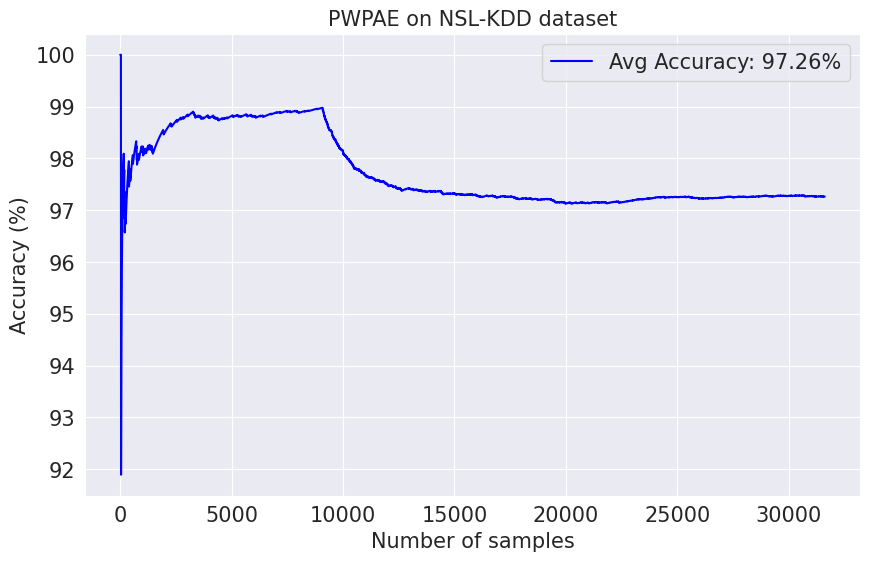

In [ ]:
%%time
# Use the Performance Weighted Probability Averaging Ensemble (PWPAE) model
name8 = "PWPAE"
t, m8 = PWPAE(X_train, y_train, X_test, y_test) # Learn the model on the dataset
acc_fig(t, m8, name8) # Draw the figure of how the real-time accuracy changes with the number of samples

In [ ]:
# Define the Window-based Performance Weighted Probability Averaging Ensemble (W-PWPAE) model
# An extension method of the PWPAE model
from river import feature_selection
from river import stats
def MSANA(model1, model2, model3, model4, X_train, y_train, X_test, y_test):
    # Record the real-time accuracy of PWPAE and 4 base learners
    metric = metrics.Accuracy()
    metric1 = metrics.Accuracy()
    metric2 = metrics.Accuracy()
    metric3 = metrics.Accuracy()
    metric4 = metrics.Accuracy()

    metric_w1 = []
    metric_w2 = []
    metric_w3 = []
    metric_w4 = []


    i=0
    t = []
    m = []
    m1 = []
    m2 = []
    m3 = []
    m4 = []
    yt = []
    yp = []

    hat1 = model1
    hat2 = model2
    hat3 = model3
    hat4 = model4

    # Define the two feature selections methods: Variance Threshold and Select-K-Best
    selector1 = feature_selection.VarianceThreshold(threshold = 0.1)
    selector2 = feature_selection.SelectKBest(similarity=stats.PearsonCorr(),k=40)

    # Use EDDM to detect concept drift, it can be replaced with other drift detection methods like ADWIN, DDM, etc.
    eddm = EDDM()
    drift = 0

    # Initial feature selection on the training set
    for xi1, yi1 in stream.iter_pandas(X_train, y_train):
        selector1.learn_one(xi1)

    for xi1, yi1 in stream.iter_pandas(X_train, y_train):
        xi1 = selector1.transform_one(xi1)
        selector2.learn_one(xi1,yi1)

    # Train the online models on the training set
    for xi1, yi1 in stream.iter_pandas(X_train, y_train):
        xi1 = selector1.transform_one(xi1)
        xi1 = selector2.transform_one(xi1)
        hat1.learn_one(xi1,yi1)
        hat2.learn_one(xi1,yi1)
        hat3.learn_one(xi1,yi1)
        hat4.learn_one(xi1,yi1)

    # Predict the test set
    for xi, yi in stream.iter_pandas(X_test, y_test):
        # The four base learners predict the labels
        xi = selector1.transform_one(xi)
        xi = selector2.transform_one(xi)
        y_pred1= hat1.predict_one(xi)
        y_prob1= hat1.predict_proba_one(xi)
        hat1.learn_one(xi,yi)

        y_pred2= hat2.predict_one(xi)
        y_prob2= hat2.predict_proba_one(xi)
        hat2.learn_one(xi,yi)

        y_pred3= hat3.predict_one(xi)
        y_prob3= hat3.predict_proba_one(xi)
        hat3.learn_one(xi,yi)

        y_pred4= hat4.predict_one(xi)
        y_prob4= hat4.predict_proba_one(xi)
        hat4.learn_one(xi,yi)

        if y_pred1 == yi:
            metric_w1.append(0)
        else:
            metric_w1.append(1)
        if y_pred2 == yi:
            metric_w2.append(0)
        else:
            metric_w2.append(1)
        if y_pred3 == yi:
            metric_w3.append(0)
        else:
            metric_w3.append(1)
        if y_pred4 == yi:
            metric_w4.append(0)
        else:
            metric_w4.append(1)

        # Record their real-time accuracy
        metric1 = metric1.update(yi, y_pred1)
        metric2 = metric2.update(yi, y_pred2)
        metric3 = metric3.update(yi, y_pred3)
        metric4 = metric4.update(yi, y_pred4)


        # Calculate the real-time window error rates of four base learners
        if i<1000:
            e1 = 0
            e2 = 0
            e3 = 0
            e4 = 0
        else:
            e1 = sum(metric_w1[round(0.9*i):i])/len(metric_w1[round(0.9*i):i])
            e2 = sum(metric_w2[round(0.9*i):i])/len(metric_w1[round(0.9*i):i])
            e3 = sum(metric_w3[round(0.9*i):i])/len(metric_w1[round(0.9*i):i])
            e4 = sum(metric_w4[round(0.9*i):i])/len(metric_w1[round(0.9*i):i])


        ep = 0.001 # The epsilon used to avoid dividing by 0

        # Calculate the weight of each base learner by the reciprocal of its window real-time error rate
        ea = 1/(e1+ep)+1/(e2+ep)+1/(e3+ep)+1/(e4+ep)
        w1 = 1/(e1+ep)/ea
        w2 = 1/(e2+ep)/ea
        w3 = 1/(e3+ep)/ea
        w4 = 1/(e4+ep)/ea

        # Make ensemble predictions by the classification probabilities
        if  y_pred1 == 1:
            ypro10=1-y_prob1[1]
            ypro11=y_prob1[1]
        else:
            ypro10=y_prob1[0]
            ypro11=1-y_prob1[0]
        if  y_pred2 == 1:
            ypro20=1-y_prob2[1]
            ypro21=y_prob2[1]
        else:
            ypro20=y_prob2[0]
            ypro21=1-y_prob2[0]
        if  y_pred3 == 1:
            ypro30=1-y_prob3[1]
            ypro31=y_prob3[1]
        else:
            ypro30=y_prob3[0]
            ypro31=1-y_prob3[0]
        if  y_pred4 == 1:
            ypro40=1-y_prob4[1]
            ypro41=y_prob4[1]
        else:
            ypro40=y_prob4[0]
            ypro41=1-y_prob4[0]

        # Calculate the final probabilities of classes 0 & 1 to make predictions
        y_prob_0 = w1*ypro10+w2*ypro20+w3*ypro30+w4*ypro40
        y_prob_1 = w1*ypro11+w2*ypro21+w3*ypro31+w4*ypro41

#         print(str(i)+" "+str(w1)+" "+str(w2)+" "+str(w3)+" "+str(w4)+" "+str(y_prob_0)+" "+str(y_prob_1))

        if (y_prob_0>y_prob_1):
            y_pred = 0
            y_prob = y_prob_0
        else:
            y_pred = 1
            y_prob = y_prob_1

        # Update the real-time accuracy of the ensemble model
        metric = metric.update(yi, y_pred)

        # Detect concept drift
        val = 0
        if yi != y_pred:
            val = 1
        in_drift, in_warning = eddm.update(float(val))

        if in_drift & (i>1000) :
            print(f"Change detected at index {i}")
            drift = 1 # indicating that a drift occurs

        # If a drift is detected
        if drift == 1:
            x_new = X_test[round(0.9*i):i]
            y_new = y_test[round(0.9*i):i]

            # Relearn the online models on the most recent window data (representing new concept data)
            hat1 = ensemble.AdaptiveRandomForestClassifier(n_models=3) # ARF-ADWIN
            hat2 = neighbors.KNNADWINClassifier(window_size=100)
            hat3 = ensemble.AdaptiveRandomForestClassifier(n_models=3,drift_detector=EDDM(),warning_detector=EDDM()) # ARF-EDDM
            hat4 = linear_model.PAClassifier() # SRP-DDM

            # Re-select features
            selector1 = feature_selection.VarianceThreshold(threshold = 0.1)
            selector2 = feature_selection.SelectKBest(similarity=stats.PearsonCorr(),k=40)

            for xj, yj in stream.iter_pandas(x_new, y_new):
                selector1 = selector1.learn_one(xj)
            for xj, yj in stream.iter_pandas(x_new, y_new):
                xj = selector1.transform_one(xj)
                selector2 = selector2.learn_one(xj, yj)
            for xj, yj in stream.iter_pandas(x_new, y_new):
                xj = selector1.transform_one(xj)
                xa = selector2.transform_one(xj)
                hat1.learn_one(xa,yj)
                hat2.learn_one(xa,yj)
                hat3.learn_one(xa,yj)
                hat4.learn_one(xa,yj)

                if j ==1:
                    print(len(xa))
                    j=0
            drift = 0

        j=1


        t.append(i)
        m.append(metric.get()*100)

        yt.append(yi)
        yp.append(y_pred)

        i=i+1

    # outputs
    print("Accuracy: "+str(round(accuracy_score(yt,yp),4)*100)+"%")
    print("Precision: "+str(round(precision_score(yt,yp),4)*100)+"%")
    print("Recall: "+str(round(recall_score(yt,yp),4)*100)+"%")
    print("F1-score: "+str(round(f1_score(yt,yp),4)*100)+"%")
    print(metric1.get()*100)
    print(metric2.get()*100)
    print(metric3.get()*100)
    print(metric4.get()*100)
    return t, m

Change detected at index 1322
27
Change detected at index 1766
26
Change detected at index 2311
29
Change detected at index 2854
28
Change detected at index 3493
35
Change detected at index 3962
33
Change detected at index 5497
31
Change detected at index 6358
30
Change detected at index 6975
28
Change detected at index 7557
33
Change detected at index 8404
31
Change detected at index 9130
35
Change detected at index 9501
35
Accuracy: 95.89%
Precision: 96.41999999999999%
Recall: 95.95%
F1-score: 96.19%
95.023239637019
89.00306699971543
94.65962626869448
88.83548866474847
CPU times: user 2min 36s, sys: 598 ms, total: 2min 36s
Wall time: 2min 40s


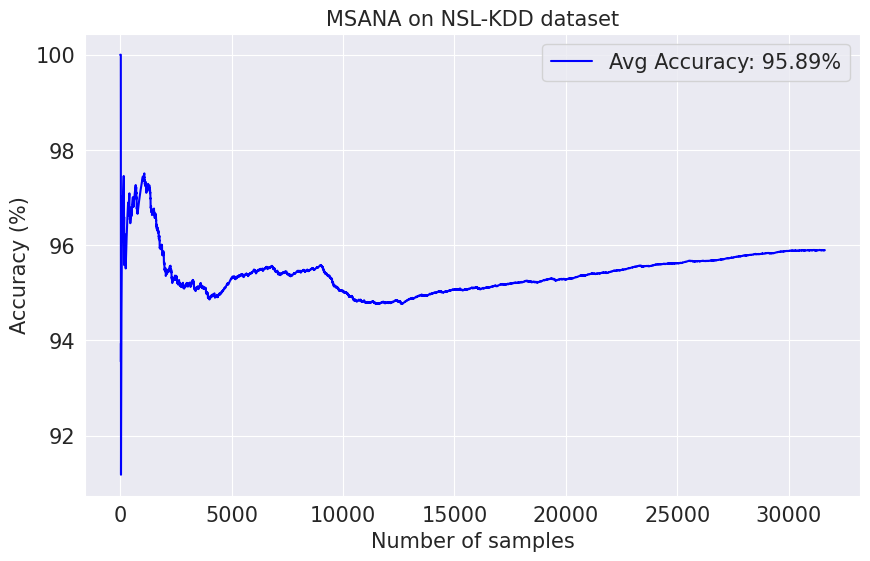

In [ ]:
%%time
# Use the Multi-Stage Automated Network Analytics (MSANA) model

# Select the four base online models, they can be changed based on the performance of the models
bm1 = ensemble.AdaptiveRandomForestClassifier(n_models=3) # ARF-ADWIN
bm2 = neighbors.KNNADWINClassifier(window_size=100) # KNN-ADWIN
bm3 = ensemble.AdaptiveRandomForestClassifier(n_models=3,drift_detector=EDDM(),warning_detector=EDDM()) # ARF-EDDM
bm4 = linear_model.PAClassifier() # OPA

name9 = "MSANA"
t, m9 = MSANA(bm1, bm2, bm3, bm4, X_train, y_train, X_test, y_test) # Learn the model on the dataset
acc_fig(t, m9, name9) # Draw the figure of how the real-time accuracy changes with the number of samples

Accuracy: 99.22%
Precision: 99.27%
Recall: 99.29%
F1-score: 99.28%
CPU times: user 1min 56s, sys: 363 ms, total: 1min 56s
Wall time: 1min 57s


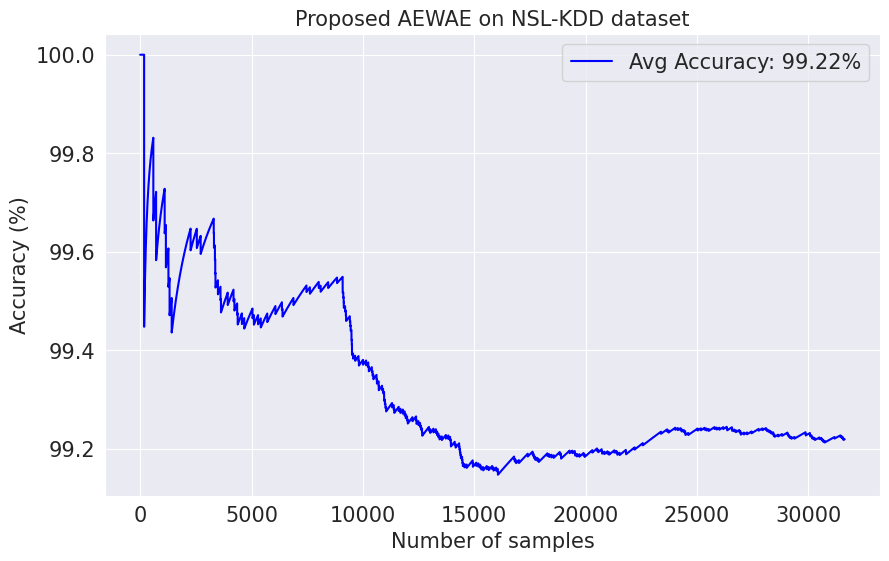

In [ ]:
%%time
# proposed Adaptive Exponentially Weighted Average Ensemble (AEWAE) model
name = "Proposed AEWAE"
t, m = AEWAE(X_train, y_train, X_test, y_test, 0.006222085103845016) # Learn the model on the dataset
acc_fig(t, m, name) # Draw the figure of how the real-time accuracy changes with the number of samples

### Model comparison

In [ ]:
name = "Proposed AEWAE"
name1 = "ARF-ADWIN"
name2 = "ARF-EDDM"
name3 = "OPA"
name4 = "SRP"
name5 = "KNN-ADWIN"
name6 = "HT"
name7 = "HATT"
name8 = "PWPAE"
name9 = "MSANA"

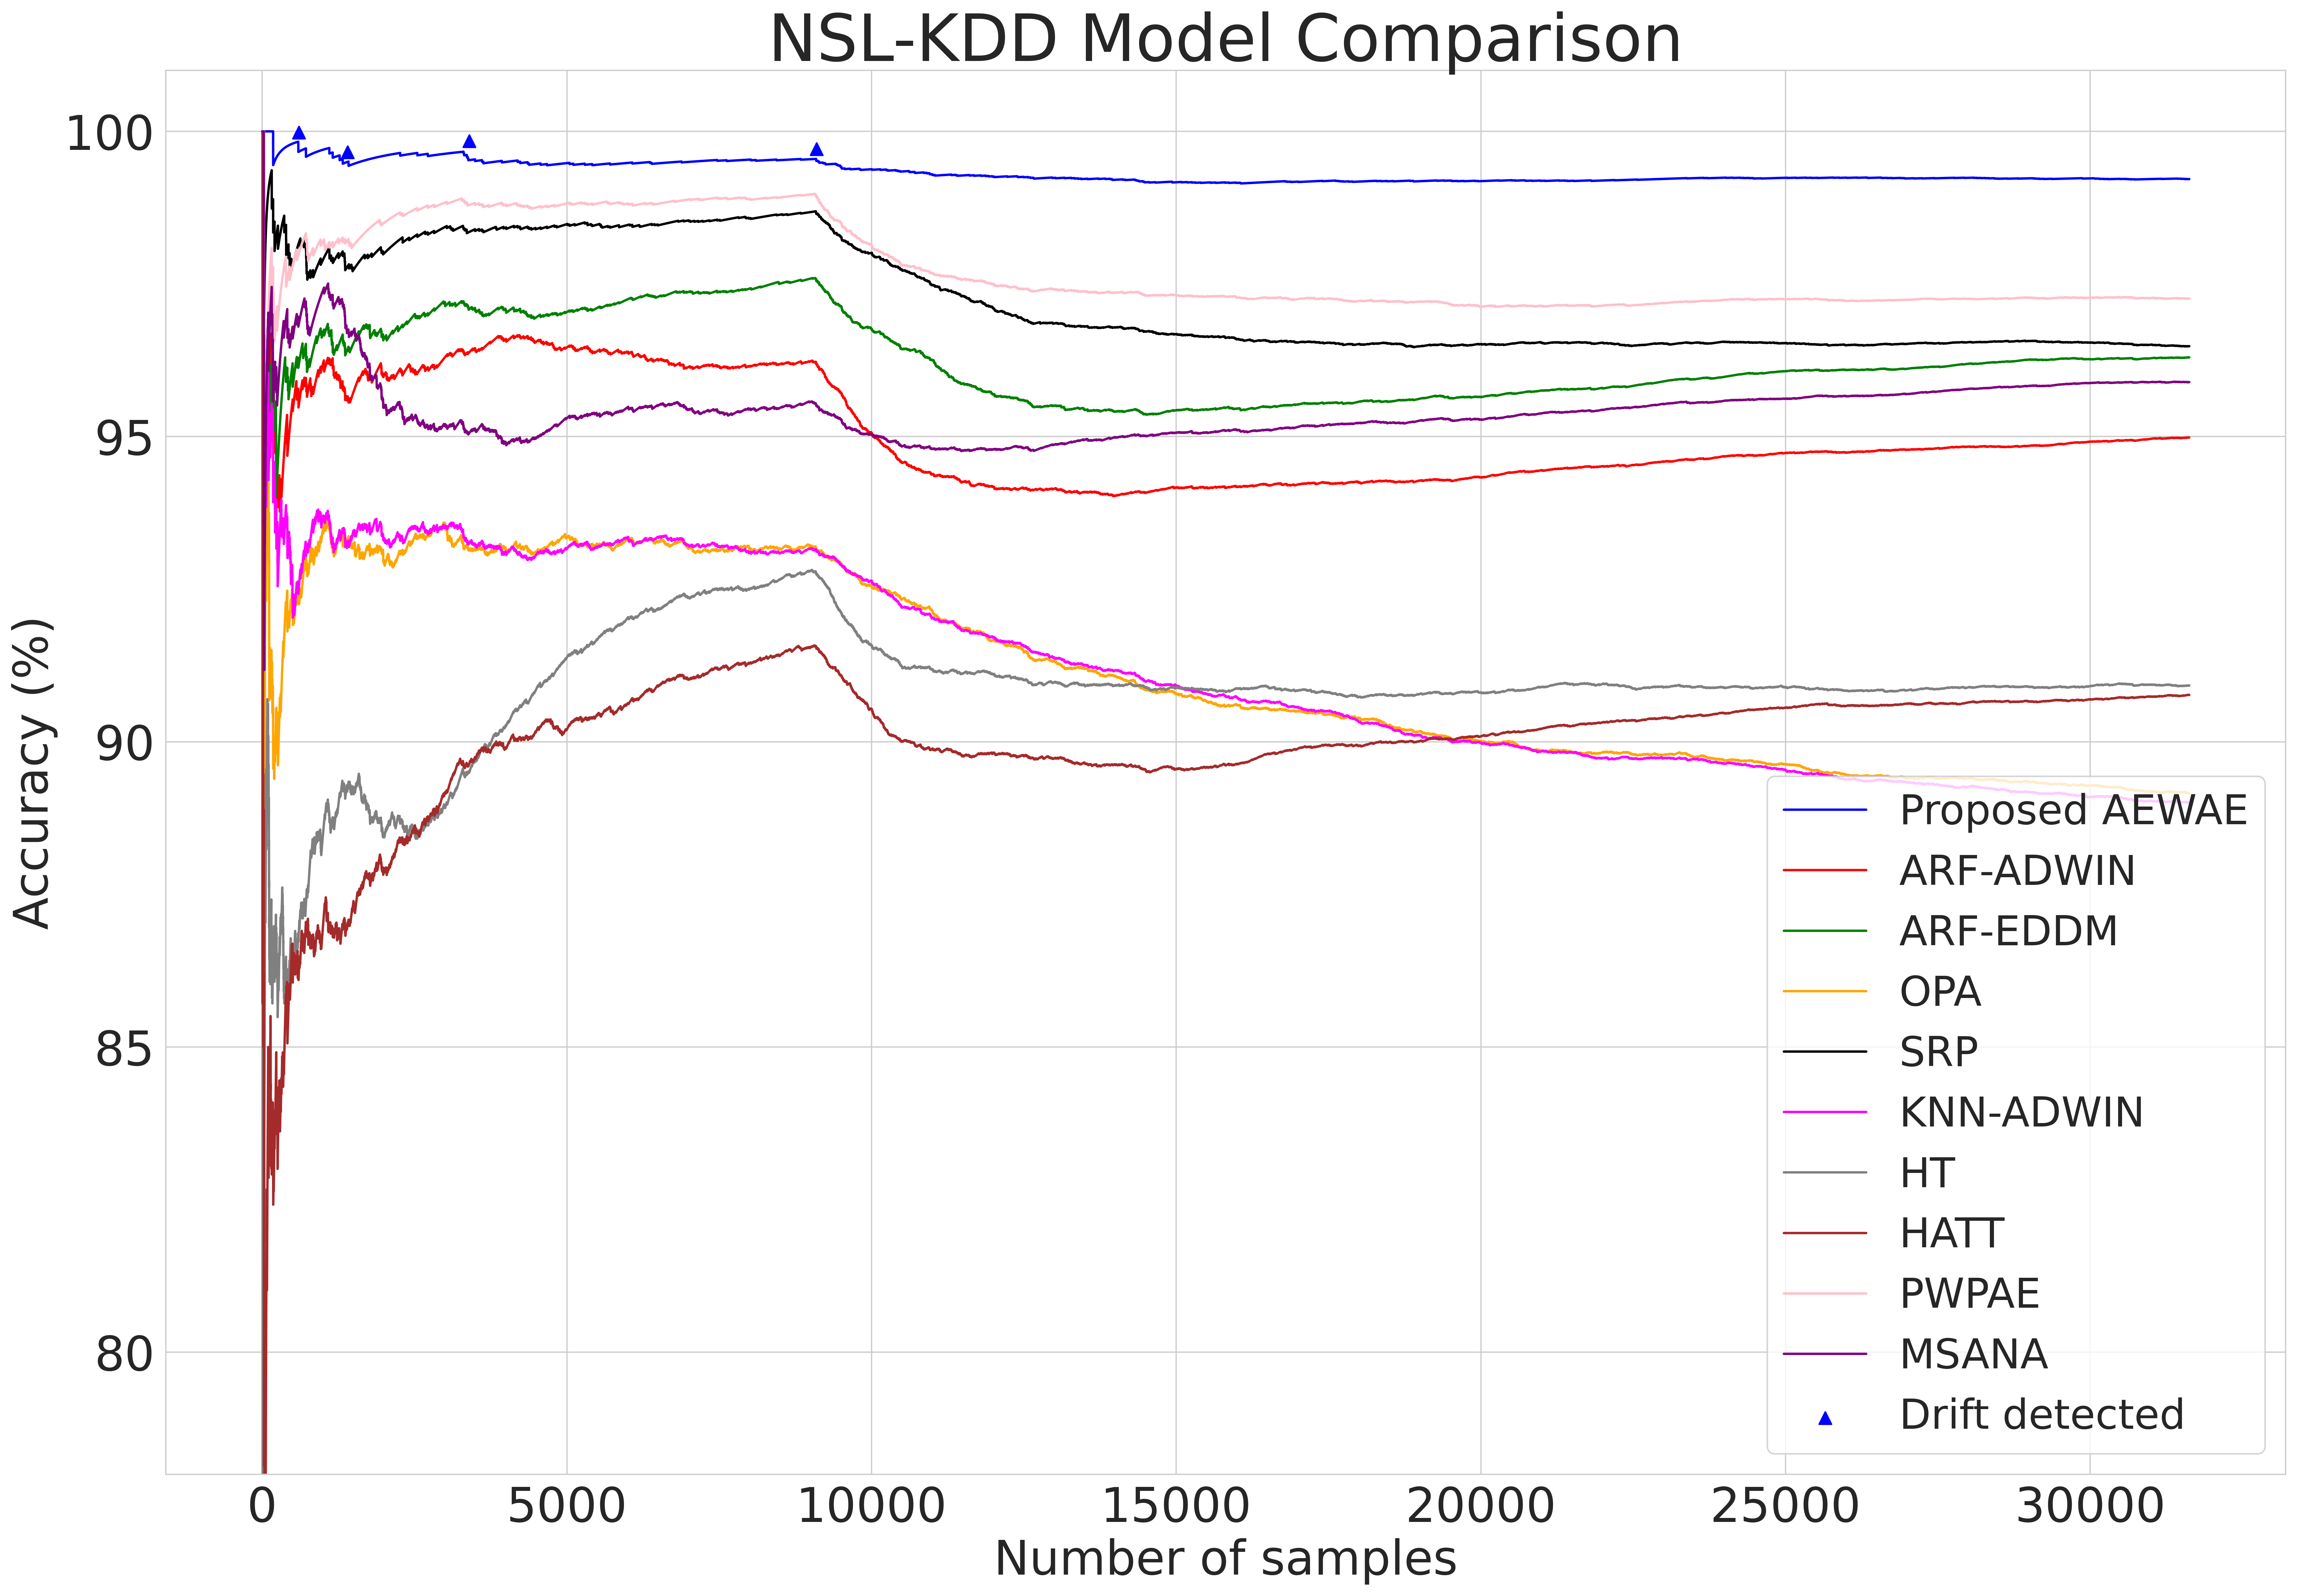

In [ ]:
# Draw a comprehensive figure to compare the performance of all models
# https://matplotlib.org/stable/gallery/color/named_colors.html
plt.rcParams.update({'font.size': 30})
plt.figure(1,figsize=(24,16), dpi=400)
sns.set_style("whitegrid")
plt.clf()

# Plot the accuracy change of each learner
plt.plot(t,m,'-b',label=name)
# plt.plot(t,m0,'pink',label=name0')
plt.plot(t,m1,'-r',label=name1)
plt.plot(t,m2,'-g',label=name2)
plt.plot(t,m3,'orange',label=name3)
plt.plot(t,m4,'black',label=name4)
plt.plot(t,m5,'magenta',label=name5)
plt.plot(t,m6,'grey',label=name6)
plt.plot(t,m7,'brown',label=name7)
plt.plot(t,m8,'pink',label=name8)
plt.plot(t,m9,'purple',label=name9)

plt.scatter(600, 99.98, marker='^', color='b', s=60, label='Drift detected')
plt.scatter(1400, 99.66, marker='^', color='b', s=60)
plt.scatter(9100, 99.71, marker='^', color='b', s=60)
plt.scatter(3400, 99.84, marker='^', color='b', s=60)

plt.legend(loc='lower right', fontsize=26)
plt.ylim(78, 101)
plt.title('NSL-KDD Model Comparison', fontsize=41)
plt.xlabel('Number of samples')
plt.ylabel('Accuracy (%)')

plt.savefig('/content/drive/My Drive/AEWAE/NSL-KDD.eps', format='eps', dpi=400)
plt.draw()

### PDF(Probability Density Function)

In [ ]:
def aewae_pdf(X_train, y_train, X_test, y_test, alpha):
    metric = metrics.Accuracy()
    metric1 = metrics.Accuracy()
    metric2 = metrics.Accuracy()
    metric3 = metrics.Accuracy()
    metric4 = metrics.Accuracy()

    cumulative_error1 = 0
    cumulative_error2 = 0
    cumulative_error3 = 0
    cumulative_error4 = 0

    i = 0
    t = []
    m = []
    m1 = []
    m2 = []
    m3 = []
    m4 = []
    yt = []
    yp = []
    inference_times = []


    hat1 = ensemble.AdaptiveRandomForestClassifier(n_models=3) # ARF-ADWIN
    hat2 = neighbors.KNNADWINClassifier(window_size=100) # KNN-ADWIN
    hat3 = ensemble.AdaptiveRandomForestClassifier(n_models=3,drift_detector=EDDM(),warning_detector=EDDM()) # ARF-EDDM
    hat4 = linear_model.PAClassifier() # OPA

    for xi1, yi1 in stream.iter_pandas(X_train, y_train):
        hat1.learn_one(xi1, yi1)
        hat2.learn_one(xi1, yi1)
        hat3.learn_one(xi1, yi1)
        hat4.learn_one(xi1, yi1)

    for xi, yi in stream.iter_pandas(X_test, y_test):
        start_time = time.time()
        y_pred1 = hat1.predict_one(xi)
        y_prob1 = hat1.predict_proba_one(xi)
        hat1.learn_one(xi, yi)

        y_pred2 = hat2.predict_one(xi)
        y_prob2 = hat2.predict_proba_one(xi)
        hat2.learn_one(xi, yi)

        y_pred3 = hat3.predict_one(xi)
        y_prob3 = hat3.predict_proba_one(xi)
        hat3.learn_one(xi, yi)

        y_pred4 = hat4.predict_one(xi)
        y_prob4 = hat4.predict_proba_one(xi)
        hat4.learn_one(xi, yi)

        metric1 = metric1.update(yi, y_pred1)
        metric2 = metric2.update(yi, y_pred2)
        metric3 = metric3.update(yi, y_pred3)
        metric4 = metric4.update(yi, y_pred4)

        error1 = 1 if y_pred1 != yi else 0
        error2 = 1 if y_pred2 != yi else 0
        error3 = 1 if y_pred3 != yi else 0
        error4 = 1 if y_pred4 != yi else 0

        cumulative_error1 = alpha * cumulative_error1 + (1 - alpha) * error1
        cumulative_error2 = alpha * cumulative_error2 + (1 - alpha) * error2
        cumulative_error3 = alpha * cumulative_error3 + (1 - alpha) * error3
        cumulative_error4 = alpha * cumulative_error4 + (1 - alpha) * error4

        ewa_error_rate1 = cumulative_error1 / (1 - alpha ** (i + 1))
        ewa_error_rate2 = cumulative_error2 / (1 - alpha ** (i + 1))
        ewa_error_rate3 = cumulative_error3 / (1 - alpha ** (i + 1))
        ewa_error_rate4 = cumulative_error4 / (1 - alpha ** (i + 1))


        ep = 0.001
        ea = 1 / (ewa_error_rate1 + ep) + 1 / (ewa_error_rate2 + ep) + 1 / (ewa_error_rate3 + ep) + 1 / (
                ewa_error_rate4 + ep)
        w1 = 1 / (ewa_error_rate1 + ep) / ea
        w2 = 1 / (ewa_error_rate2 + ep) / ea
        w3 = 1 / (ewa_error_rate3 + ep) / ea
        w4 = 1 / (ewa_error_rate4 + ep) / ea


        ypro10 = y_prob1.get(0, 0)
        ypro11 = y_prob1.get(1, 0)

        ypro20 = y_prob2.get(0, 0)
        ypro21 = y_prob2.get(1, 0)

        ypro30 = y_prob3.get(0, 0)
        ypro31 = y_prob3.get(1, 0)

        ypro40 = y_prob4.get(0, 0)
        ypro41 = y_prob4.get(1, 0)


        y_prob_0 = w1 * ypro10 + w2 * ypro20 + w3 * ypro30 + w4 * ypro40
        y_prob_1 = w1 * ypro11 + w2 * ypro21 + w3 * ypro31 + w4 * ypro41

        if y_prob_0 > y_prob_1:
            y_pred = 0
        else:
            y_pred = 1

        end_time = time.time()
        inference_time = end_time - start_time
        inference_times.append(inference_time)


        metric = metric.update(yi, y_pred)

        t.append(i)
        m.append(metric.get() * 100)
        yt.append(yi)
        yp.append(y_pred)

        i = i + 1



    return t, m, yt, yp, inference_times

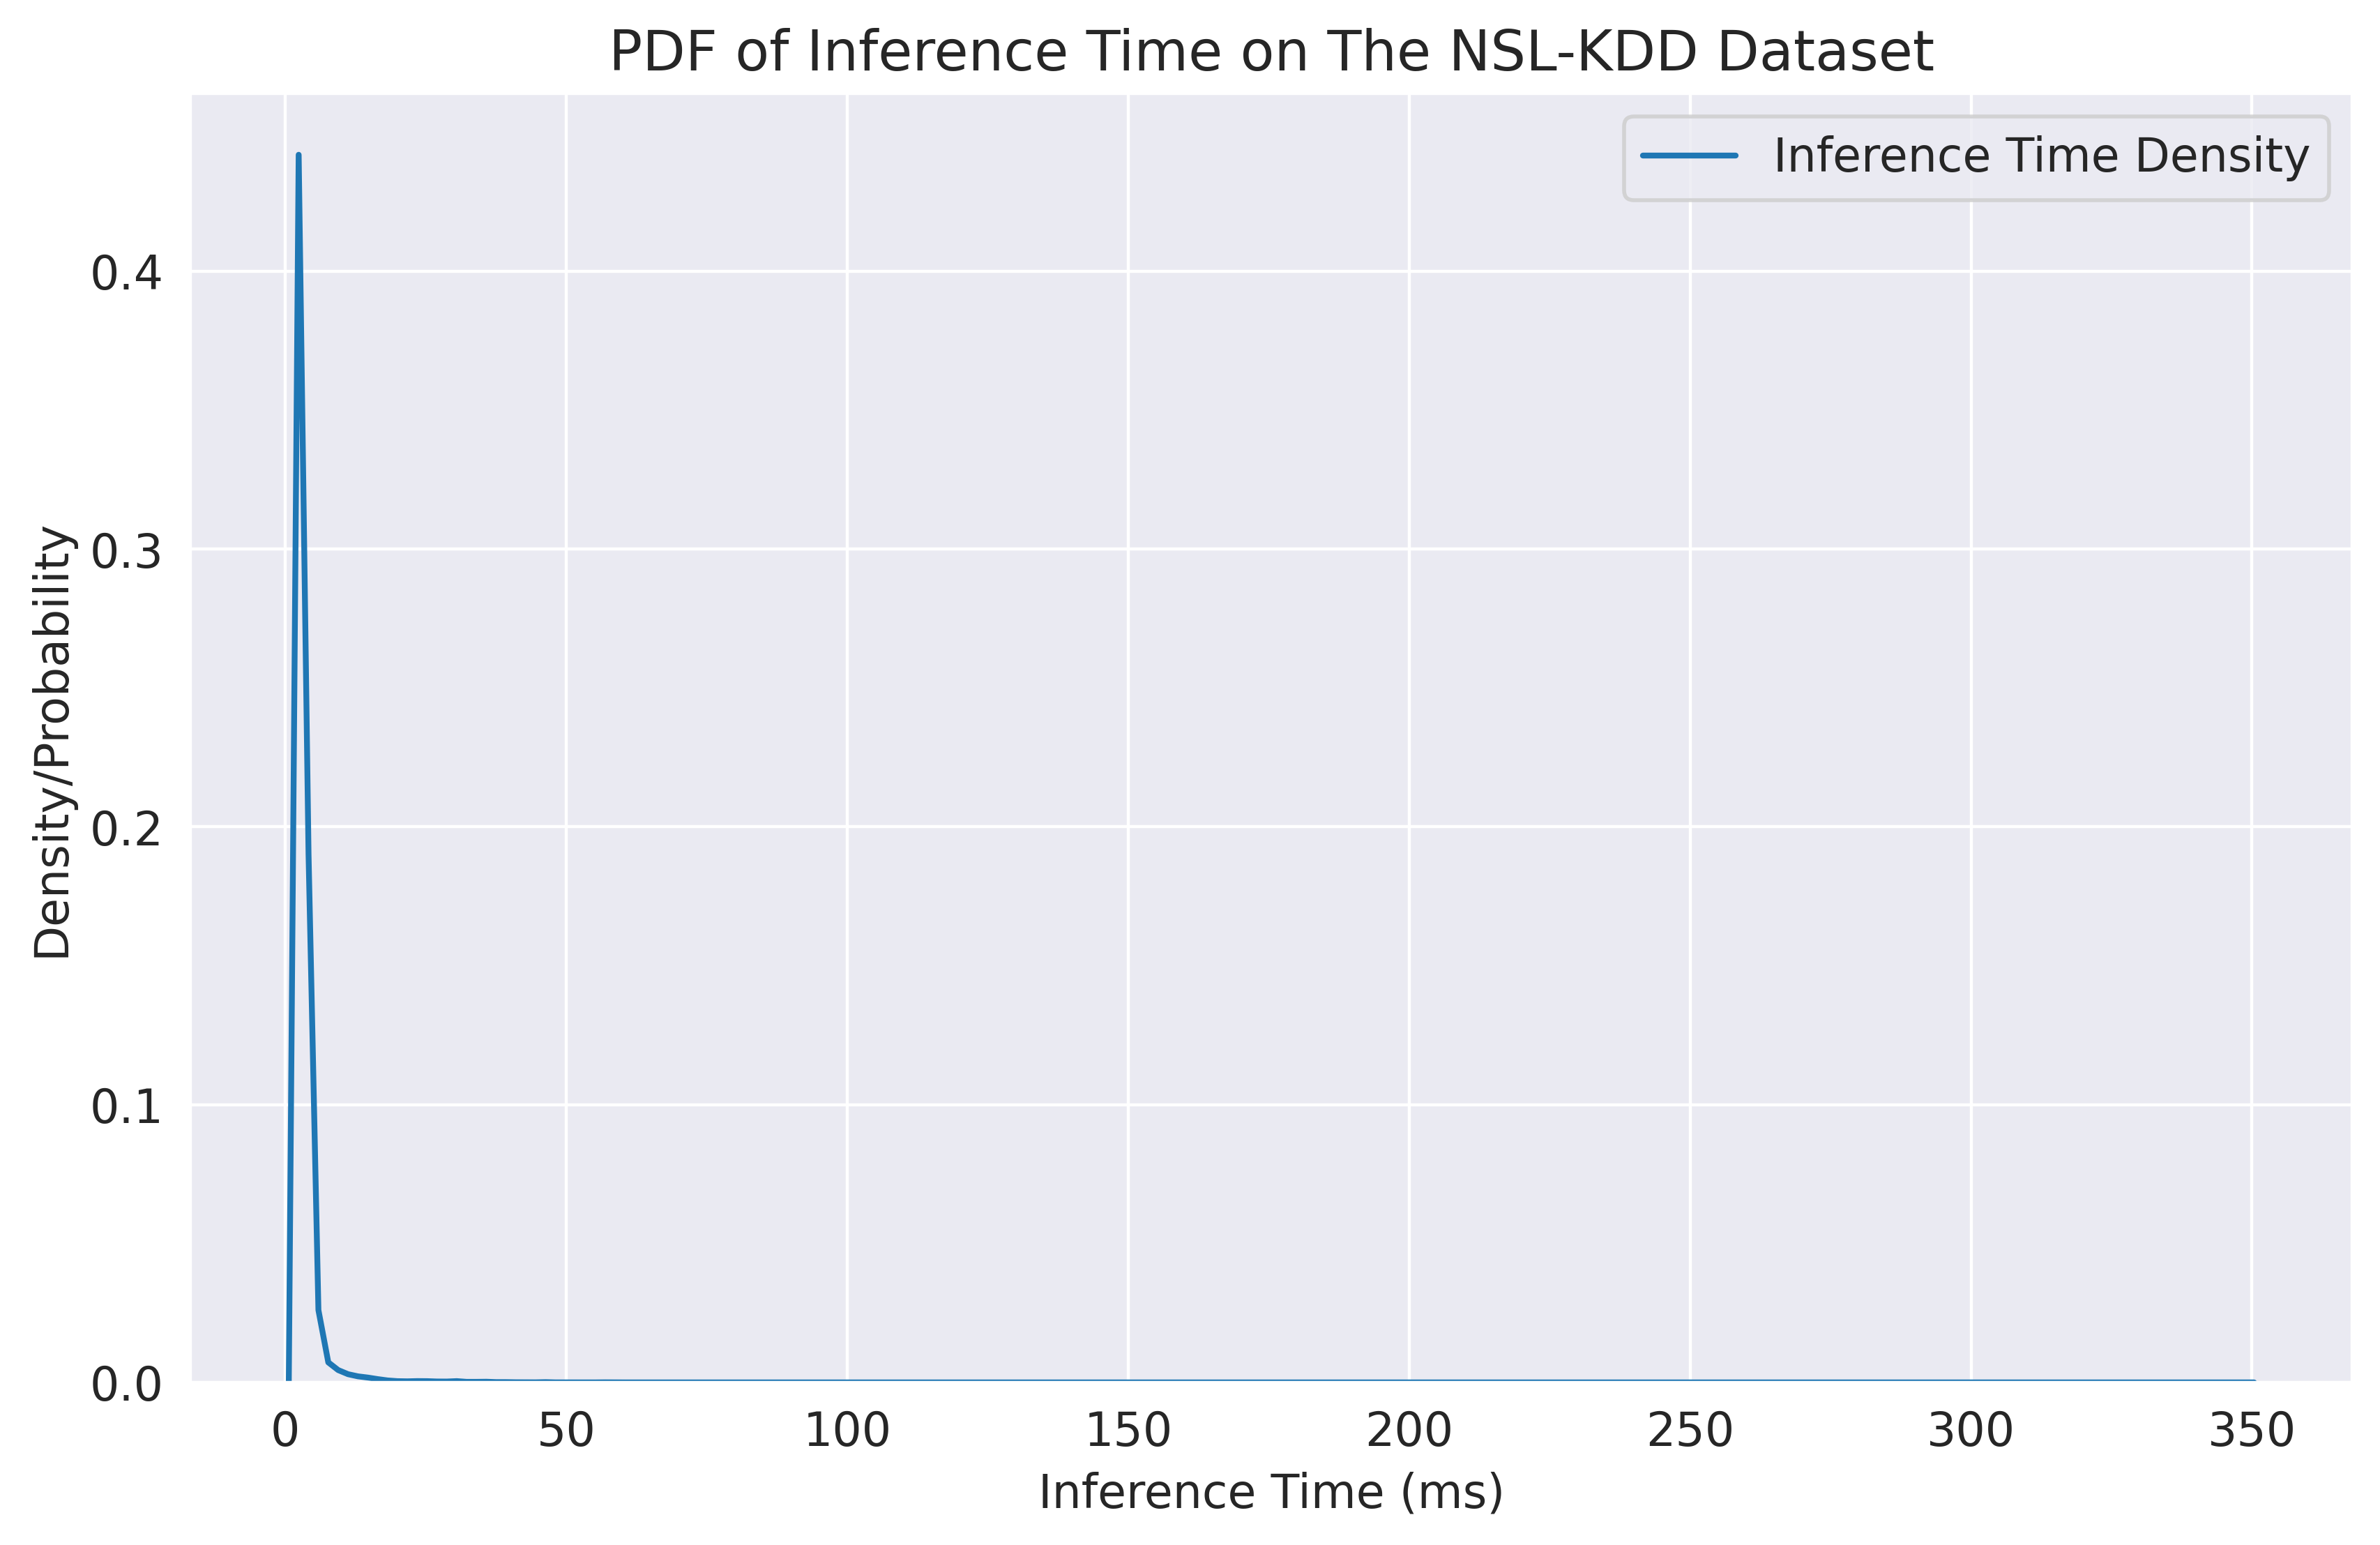

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
# Set the global font size
plt.rcParams.update({'font.size': 12})

# Call the AEWAE function and get the inference times
t, m, yt, yp, inference_times = aewae_pdf(X_train, y_train, X_test, y_test, 0.006222085103845016)

# Convert inference times from seconds to milliseconds
inference_times_ms = [time * 1000 for time in inference_times]

# Create a figure with a specified size (in inches) and resolution (DPI)
plt.figure(figsize=(10, 6), dpi=400)

# Plot the probability density function for the inference times
sns.kdeplot(inference_times_ms, label='Inference Time Density')
plt.xlabel('Inference Time (ms)')
plt.ylabel('Density/Probability')
plt.title('PDF of Inference Time on The NSL-KDD Dataset')
plt.legend()
#plt.savefig('/content/drive/My Drive/AEWAE/NSL-KDD_pdf.eps', format='eps', dpi=400)
# Show the plot with the adjusted size, font size, time unit, title, and higher resolution
plt.show()


### CDF(Cumulative Distribution Function)

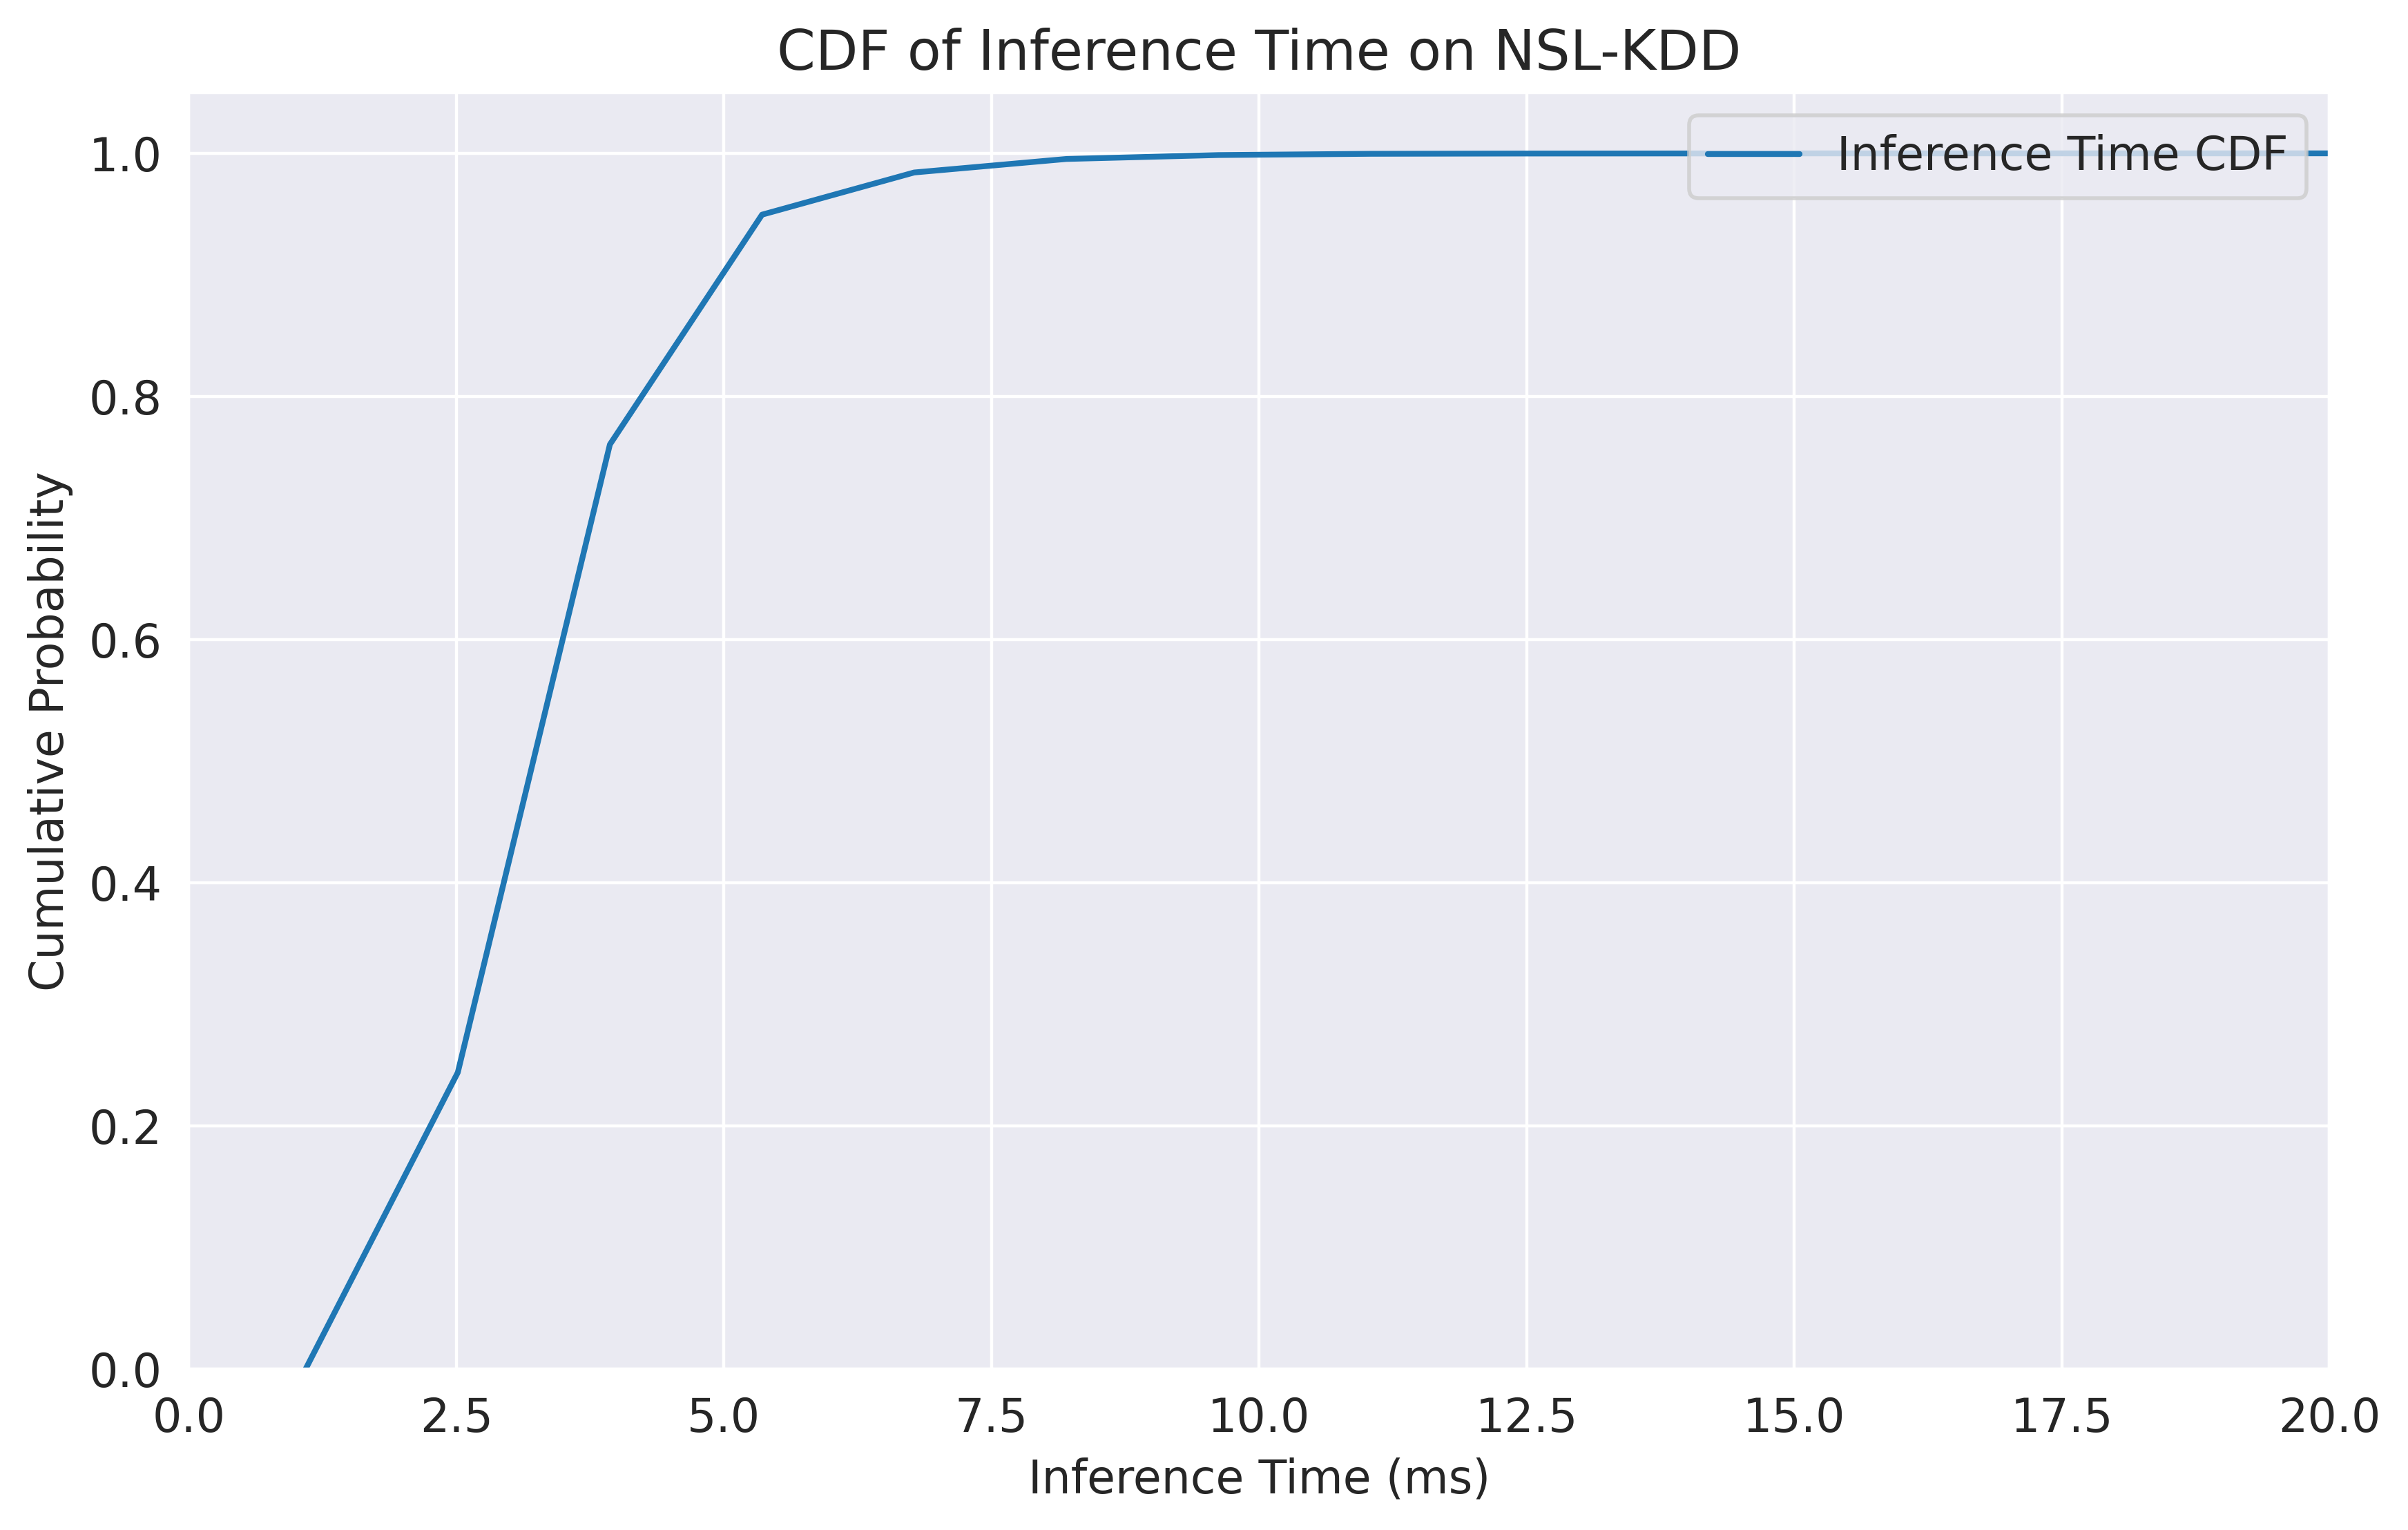

In [ ]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Continue with the setup as before...
sns.set_style("darkgrid")
plt.rcParams.update({'font.size': 12})

# Call the AEWAE function and get the inference times
t, m, yt, yp, inference_times = aewae_pdf(X_train, y_train, X_test, y_test, 0.006222085103845016)

# Convert inference times from seconds to milliseconds
inference_times_ms = [time * 1000 for time in inference_times]

# Create a figure with a specified size (in inches) and resolution (DPI)
plt.figure(figsize=(10, 6), dpi=400)

# Plot the Cumulative Distribution Function for the inference times
# Note the addition of the `cumulative=True` parameter
sns.kdeplot(inference_times_ms, cumulative=True, label='Inference Time CDF')

plt.xlabel('Inference Time (ms)')
plt.ylabel('Cumulative Probability')
plt.title('CDF of Inference Time on NSL-KDD')
plt.legend(loc='upper right')

# Set the x-axis limit to 0-20ms
plt.xlim(0, 20)

plt.savefig('/content/drive/My Drive/AEWAE/NSL-KDD_cdf.eps', format='eps', dpi=400)
# Show the plot with the adjusted size, font size, time unit, title, and higher resolution
plt.show()
